In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
import os

def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

dataPath = '/eee/mnist-data/' 
trainCsvFilePath = dataPath + "train.csv"
testCsvFilePath = dataPath + "test.csv"

def zipMinst2csv():
    if not os.path.exists(trainCsvFilePath):
        convert(mnistDataPath + "train-images-idx3-ubyte", mnistDataPath + "train-labels-idx1-ubyte",
                trainCsvFilePath, 60000)
    if not os.path.exists(testCsvFilePath):
        convert(mnistDataPath + "t10k-images-idx3-ubyte", mnistDataPath + "t10k-labels-idx1-ubyte",
                testCsvFilePath, 10000)

zipMinst2csv()

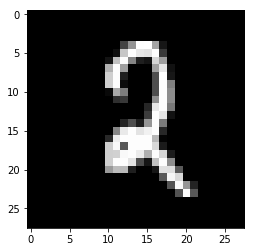

In [6]:
### 数据预处理
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

df_train = pd.read_csv(trainCsvFilePath, nrows=5000)
df_test = pd.read_csv(testCsvFilePath, nrows=5000)

X_train = df_train.drop(['label'], axis=1).values.astype('float32')
y_train = df_train['label'].values
X_test = df_test.values.astype('float32')

# 由向量重构图片
img_w, img_h = 28, 28

# 获取图片张数
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# 数据集归一化
X_train = X_train.reshape(n_train,img_w,img_h,1)
X_test = X_test.reshape(n_test,img_w,img_h,1)
X_train = X_train / 255.0
X_test = X_test / 255.0 

# 标签编码
y_train = to_categorical(y_train)

# 显示第233张手写数字的灰度图像
imgplot = plt.imshow(X_train[233,:,:,0],cmap='gray')

In [7]:
### Keras搭建卷积神经网络
# 导入依赖库
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D


# 构建基准网络
def baseline_model():
    # 创建模型
    model = Sequential()
    model.add(Convolution2D(8, 5, 5, input_shape=(28, 28, 1), activation='relu')) # 卷积层 + ReLU
    model.add(MaxPooling2D(pool_size=(2, 2))) # 最大池化
    model.add(Dropout(0.25)) # 随机断开25%的连接
    model.add(Flatten())
    model.add(Dense(16, activation='relu')) # 全连接层 + ReLU
    model.add(Dropout(0.5))　# 再加一层Dropout
    model.add(Dense(10, activation='softmax')) # 输出层 + SoftMax
    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 设置随机数发生器种子
seed = 557373801    # 集智·数据科学QQ群
numpy.random.seed(seed)

model = baseline_model()
# 拟合模型
model.fit(X_train, y_train, validation_split=0.2, nb_epoch=1, batch_size=128, verbose=2)

/fff/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), input_shape=(28, 28, 1..., activation="relu")`
  if sys.path[0] == '':
/fff/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4000 samples, validate on 1000 samples
Epoch 1/1
 - 2s - loss: 2.0249 - acc: 0.3520 - val_loss: 1.5336 - val_acc: 0.5910
